# AltScore: Exploratory Data Analysis & Visualizations

## 1. Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats
import os

warnings.filterwarnings('ignore')

# Enhanced visualization settings
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

# Create visualizations directory
os.makedirs(r'D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations', exist_ok=True)

# Custom color palettes
COLORS = {
    'primary': '#2C3E50',
    'success': '#27AE60',
    'danger': '#E74C3C',
    'warning': '#F39C12',
    'info': '#3498DB',
    'light': '#ECF0F1'
}

print("✓ Environment configured")
print(f"Analysis started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ Environment configured
Analysis started: 2026-02-15 23:43:07


In [2]:
# Load all datasets
print("📥 Loading datasets...\n")

train = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\application_train.csv')
bureau = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\bureau.csv')
bureau_balance = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\bureau_balance.csv')
previous_app = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\previous_application.csv')
pos_cash = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\POS_CASH_balance.csv')
credit_card = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\credit_card_balance.csv')
installments = pd.read_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\data\\installments_payments.csv')

print(f"✓ Loaded {len(train):,} applications")
print(f"✓ Loaded {len(bureau):,} bureau records")
print(f"✓ Loaded {len(previous_app):,} previous applications")
print(f"✓ Loaded {len(pos_cash):,} POS/Cash records")
print(f"✓ Loaded {len(installments):,} installment records\n")

📥 Loading datasets...

✓ Loaded 307,511 applications
✓ Loaded 1,716,428 bureau records
✓ Loaded 1,670,214 previous applications
✓ Loaded 10,001,358 POS/Cash records
✓ Loaded 13,605,401 installment records



## 2. Visualization 1: Target Distribution Analysis

Creating Visualization 1: Target Distribution Analysis...



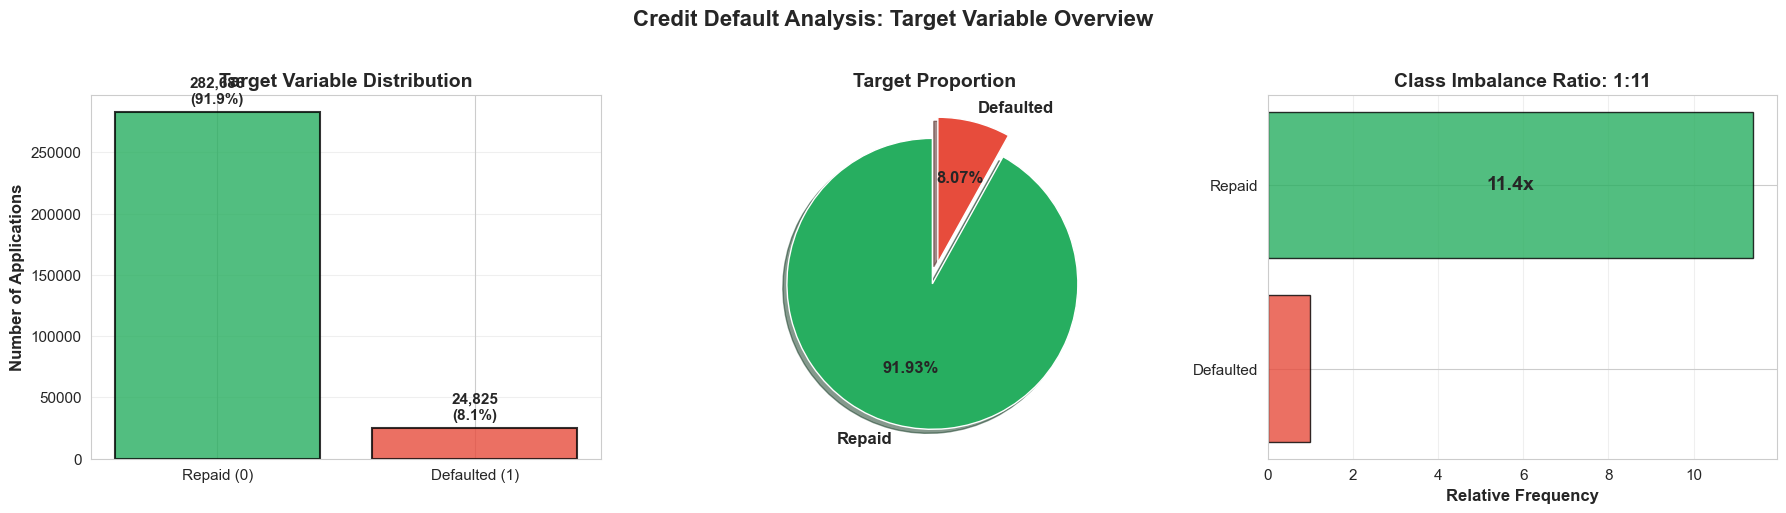

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\01_target_distribution.png


In [4]:
print("Creating Visualization 1: Target Distribution Analysis...\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Count bar chart
target_counts = train['TARGET'].value_counts().sort_index()
colors = [COLORS['success'], COLORS['danger']]
bars = axes[0].bar(['Repaid (0)', 'Defaulted (1)'], target_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('Target Variable Distribution', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Number of Applications', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, target_counts.values)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 5000,
                f'{val:,}\n({val/len(train)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Pie chart
explode = (0.05, 0.1)  # explode defaulted slice
axes[1].pie(target_counts.values, labels=['Repaid', 'Defaulted'], 
           autopct='%1.2f%%', startangle=90, colors=colors,
           explode=explode, shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Proportion', fontweight='bold', fontsize=14)

# Plot 3: Class imbalance visualization
imbalance_ratio = target_counts[0] / target_counts[1]
axes[2].barh(['Defaulted', 'Repaid'], [1, imbalance_ratio], color=[COLORS['danger'], COLORS['success']], alpha=0.8, edgecolor='black')
axes[2].set_xlabel('Relative Frequency', fontsize=12, fontweight='bold')
axes[2].set_title(f'Class Imbalance Ratio: 1:{imbalance_ratio:.0f}', fontweight='bold', fontsize=14)
axes[2].text(imbalance_ratio/2, 1, f'{imbalance_ratio:.1f}x', ha='center', va='center', fontsize=14, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Credit Default Analysis: Target Variable Overview', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\01_target_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\01_target_distribution.png")

## 3. Visualization 2: Demographic Deep Dive

Creating Visualization 2: Demographic Analysis...



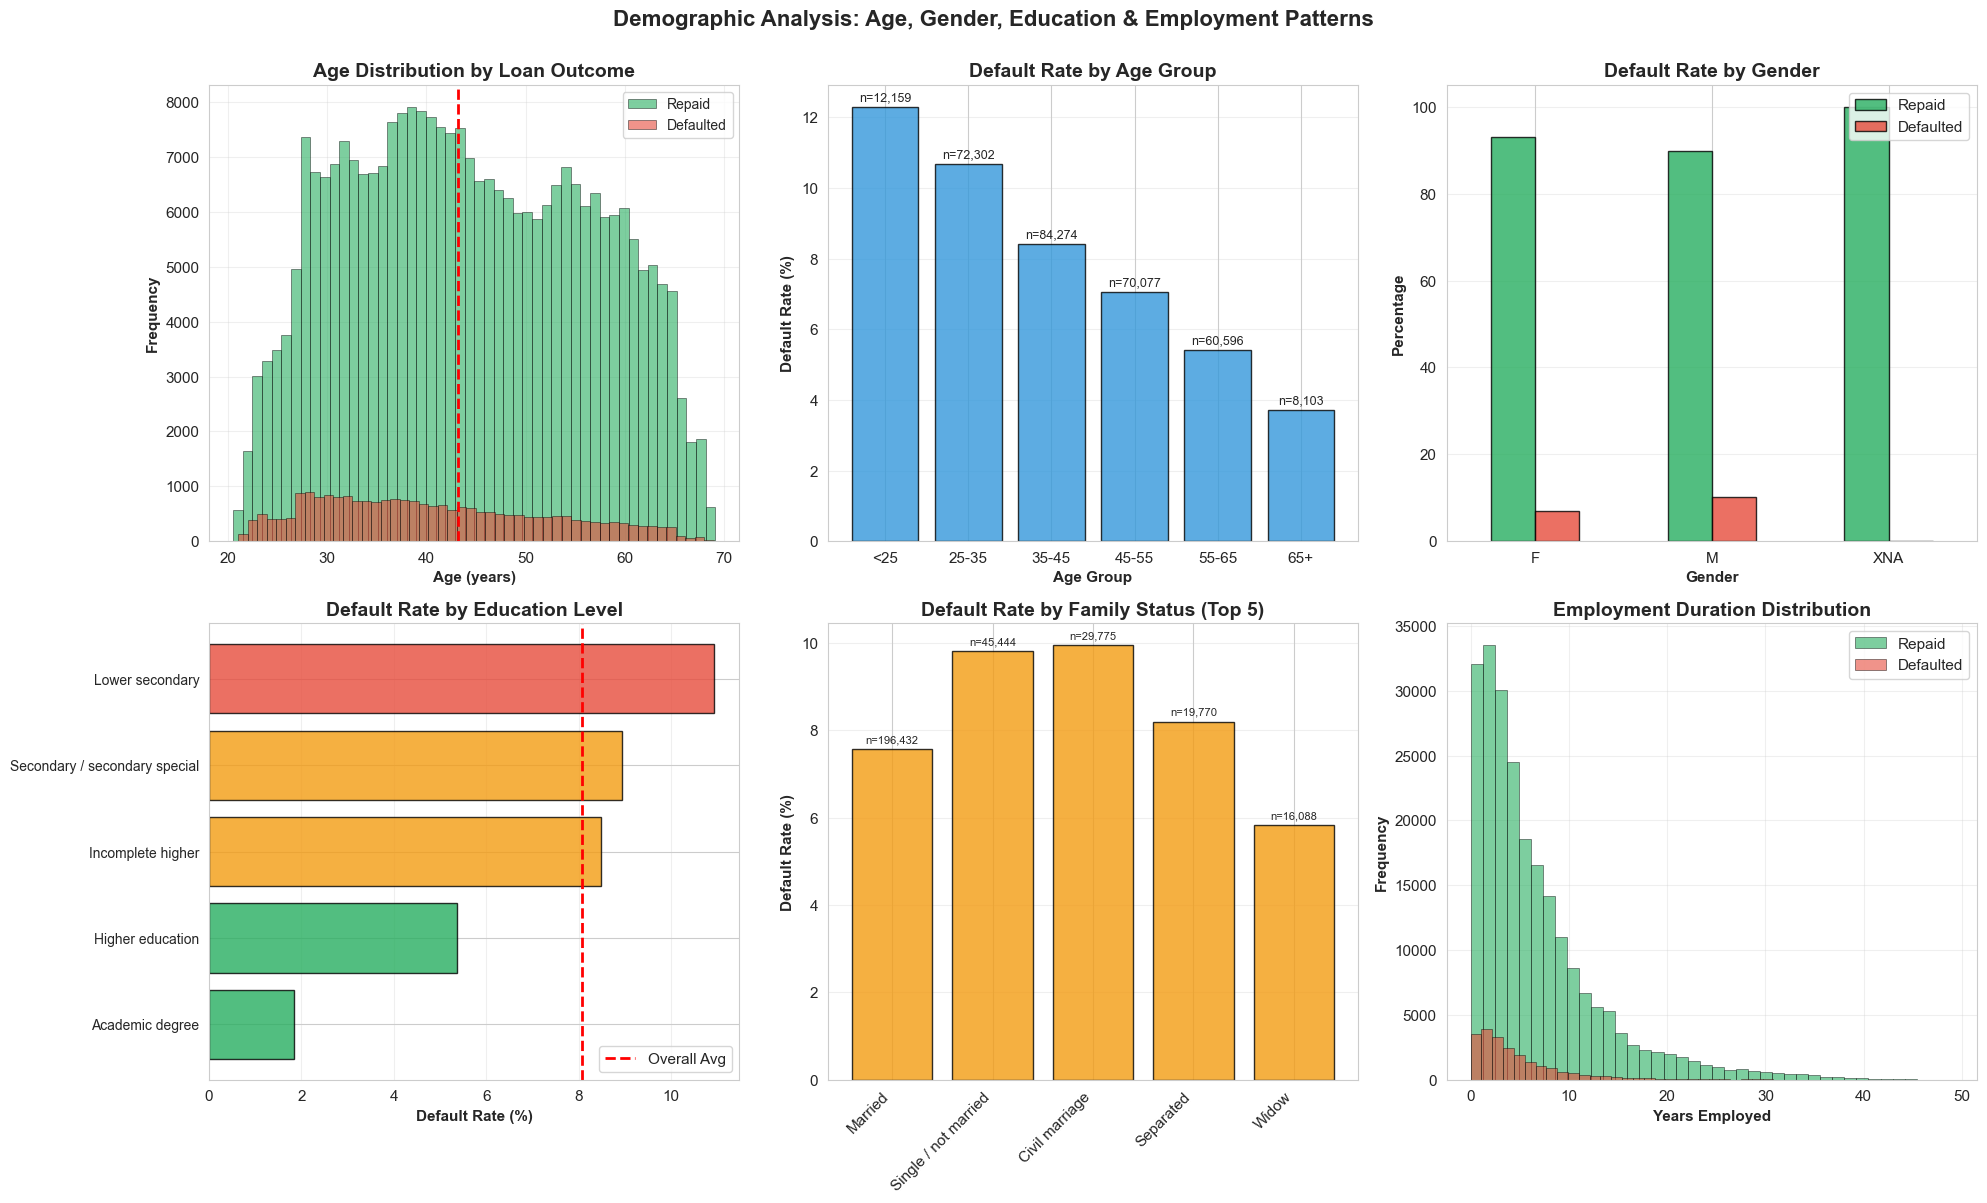

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\02_demographic_analysis.png


In [5]:
print("Creating Visualization 2: Demographic Analysis...\n")

# Create derived features
train['AGE_YEARS'] = train['DAYS_BIRTH'] / -365
train['EMPLOYMENT_YEARS'] = train['DAYS_EMPLOYED'] / -365
train['EMPLOYMENT_YEARS'] = train['EMPLOYMENT_YEARS'].clip(upper=50)  # Cap outliers

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Age distribution by target
for target in [0, 1]:
    subset = train[train['TARGET'] == target]['AGE_YEARS']
    axes[0, 0].hist(subset, bins=50, alpha=0.6, 
                   label=f"{'Repaid' if target == 0 else 'Defaulted'}",
                   color=COLORS['success'] if target == 0 else COLORS['danger'],
                   edgecolor='black', linewidth=0.5)
axes[0, 0].set_xlabel('Age (years)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Age Distribution by Loan Outcome', fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].axvline(train['AGE_YEARS'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {train["AGE_YEARS"].median():.1f}')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Default rate by age groups
train['AGE_GROUP'] = pd.cut(train['AGE_YEARS'], bins=[0, 25, 35, 45, 55, 65, 100],
                            labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
age_default = train.groupby('AGE_GROUP')['TARGET'].agg(['mean', 'count'])
bars = axes[0, 1].bar(range(len(age_default)), age_default['mean']*100, 
                     color=COLORS['info'], alpha=0.8, edgecolor='black')
axes[0, 1].set_xticks(range(len(age_default)))
axes[0, 1].set_xticklabels(age_default.index, rotation=0)
axes[0, 1].set_xlabel('Age Group', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Default Rate by Age Group', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Add count labels
for i, (bar, count) in enumerate(zip(bars, age_default['count'])):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'n={count:,}', ha='center', va='bottom', fontsize=9)

# Plot 3: Gender analysis
gender_target = pd.crosstab(train['CODE_GENDER'], train['TARGET'], normalize='index') * 100
gender_target.plot(kind='bar', ax=axes[0, 2], color=[COLORS['success'], COLORS['danger']], alpha=0.8, edgecolor='black')
axes[0, 2].set_title('Default Rate by Gender', fontweight='bold')
axes[0, 2].set_xlabel('Gender', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('Percentage', fontsize=11, fontweight='bold')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=0)
axes[0, 2].legend(['Repaid', 'Defaulted'], loc='upper right')
axes[0, 2].grid(axis='y', alpha=0.3)

# Plot 4: Education level impact
education_target = train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(['mean', 'count']).sort_values('mean')
colors_edu = [COLORS['success'] if x < 0.08 else COLORS['warning'] if x < 0.10 else COLORS['danger'] 
              for x in education_target['mean']]
bars = axes[1, 0].barh(range(len(education_target)), education_target['mean']*100, 
                      color=colors_edu, alpha=0.8, edgecolor='black')
axes[1, 0].set_yticks(range(len(education_target)))
axes[1, 0].set_yticklabels(education_target.index, fontsize=10)
axes[1, 0].set_xlabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Default Rate by Education Level', fontweight='bold')
axes[1, 0].axvline(train['TARGET'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Avg')
axes[1, 0].legend()
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 5: Family status
family_target = train.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(['mean', 'count']).sort_values('count', ascending=False).head(5)
bars = axes[1, 1].bar(range(len(family_target)), family_target['mean']*100, 
                     color=COLORS['warning'], alpha=0.8, edgecolor='black')
axes[1, 1].set_xticks(range(len(family_target)))
axes[1, 1].set_xticklabels(family_target.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Default Rate by Family Status (Top 5)', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# Add sample size
for i, (bar, count) in enumerate(zip(bars, family_target['count'])):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'n={count:,}', ha='center', va='bottom', fontsize=8, rotation=0)

# Plot 6: Employment duration
emp_mask = (train['EMPLOYMENT_YEARS'] > 0) & (train['EMPLOYMENT_YEARS'] < 50)
for target in [0, 1]:
    subset = train[emp_mask & (train['TARGET'] == target)]['EMPLOYMENT_YEARS']
    axes[1, 2].hist(subset, bins=40, alpha=0.6,
                   label=f"{'Repaid' if target == 0 else 'Defaulted'}",
                   color=COLORS['success'] if target == 0 else COLORS['danger'],
                   edgecolor='black', linewidth=0.5)
axes[1, 2].set_xlabel('Years Employed', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Employment Duration Distribution', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.suptitle('Demographic Analysis: Age, Gender, Education & Employment Patterns', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\02_demographic_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\02_demographic_analysis.png")

## 4. Visualization 3: Financial Features Deep Analysis

Creating Visualization 3: Financial Features Analysis...



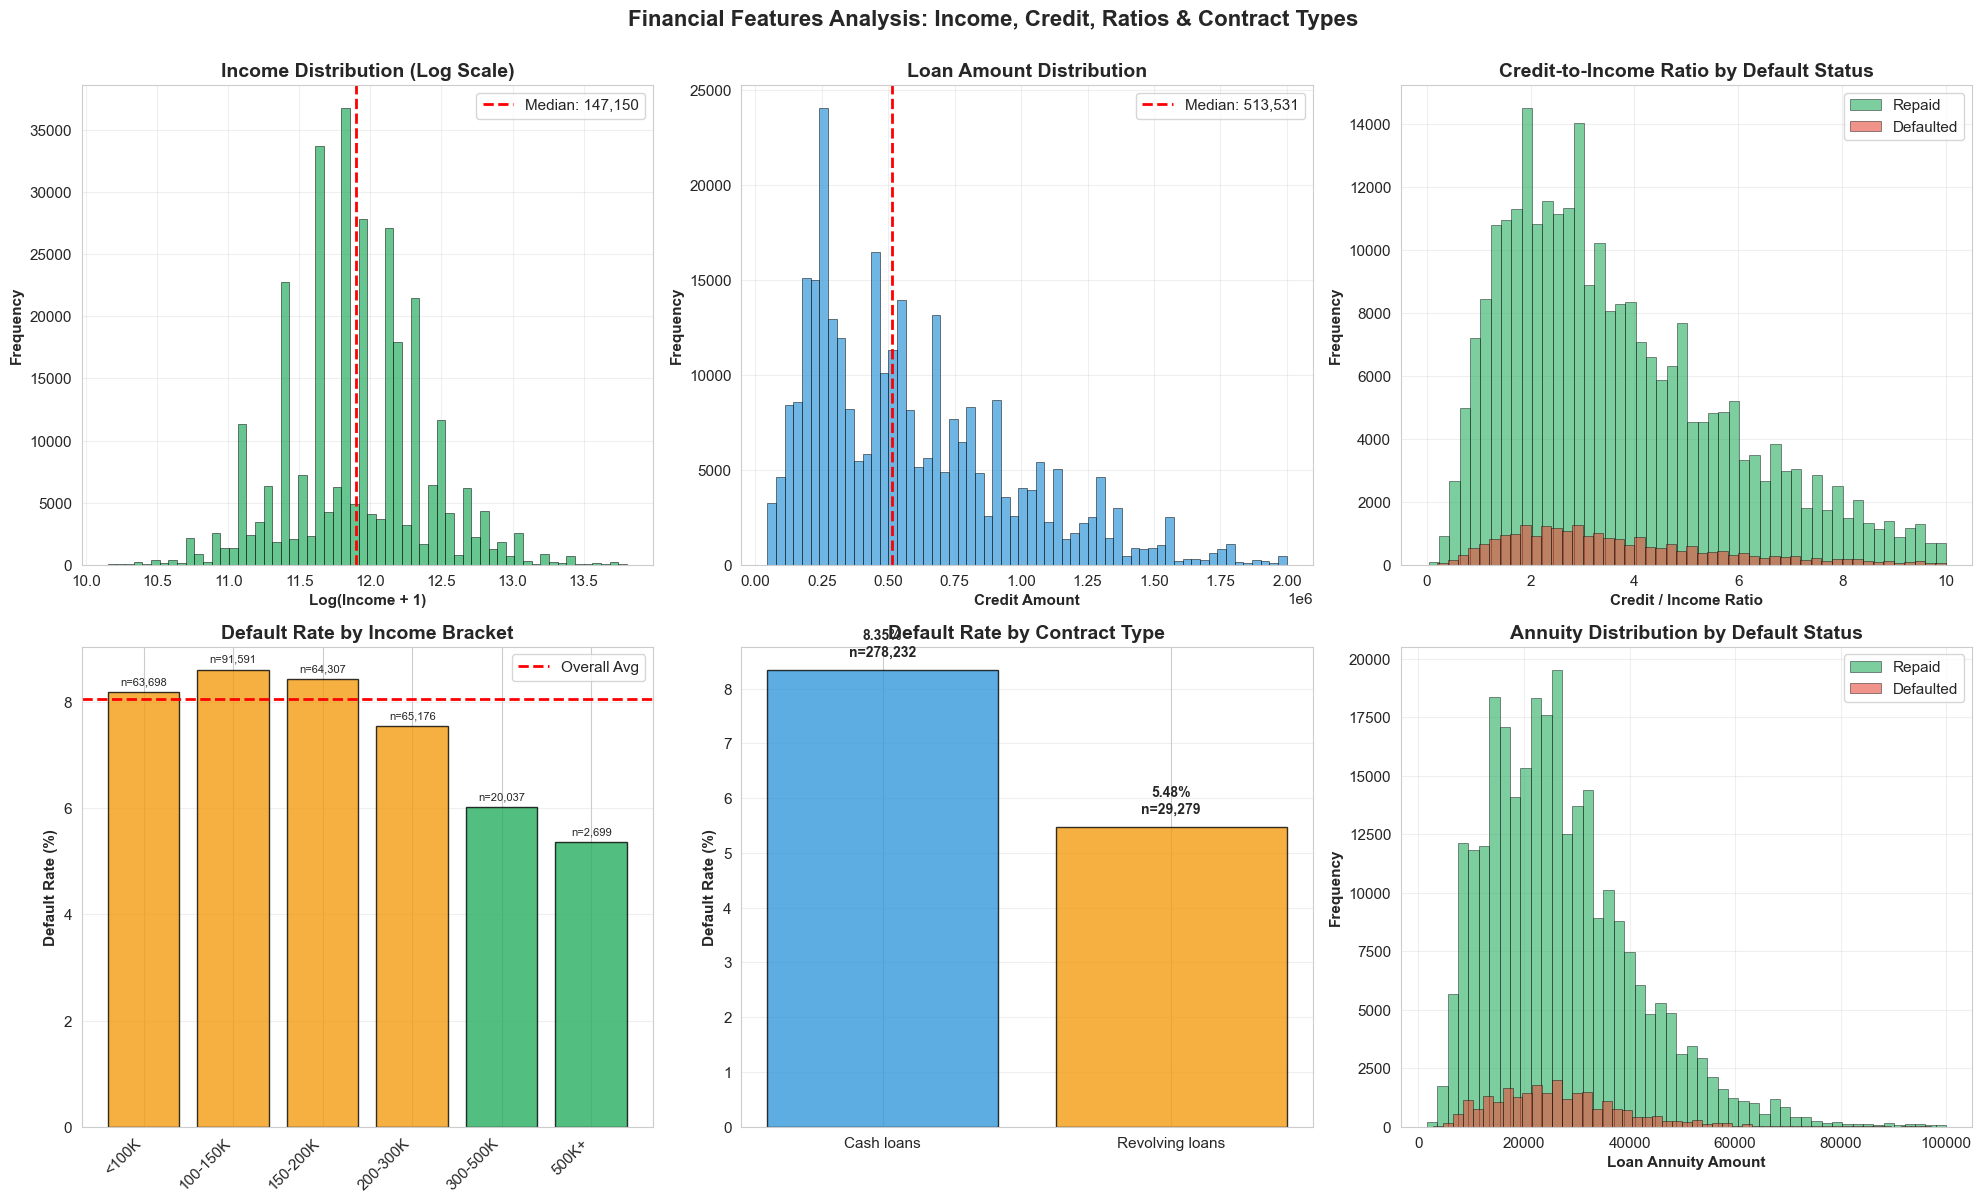

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\03_financial_features.png


In [6]:
print("Creating Visualization 3: Financial Features Analysis...\n")

# Create financial ratios
train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_INCOME_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['CREDIT_GOODS_RATIO'] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Income distribution (log scale)
income_data = train['AMT_INCOME_TOTAL'][train['AMT_INCOME_TOTAL'] < 1000000]  # Filter outliers
axes[0, 0].hist(np.log1p(income_data), bins=60, color=COLORS['success'], 
               alpha=0.7, edgecolor='black', linewidth=0.5)
axes[0, 0].set_xlabel('Log(Income + 1)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Income Distribution (Log Scale)', fontweight='bold')
axes[0, 0].axvline(np.log1p(train['AMT_INCOME_TOTAL'].median()), color='red', 
                  linestyle='--', linewidth=2, label=f'Median: {train["AMT_INCOME_TOTAL"].median():,.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Credit amount distribution
credit_data = train['AMT_CREDIT'][train['AMT_CREDIT'] < 2000000]
axes[0, 1].hist(credit_data, bins=60, color=COLORS['info'], 
               alpha=0.7, edgecolor='black', linewidth=0.5)
axes[0, 1].set_xlabel('Credit Amount', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Loan Amount Distribution', fontweight='bold')
axes[0, 1].axvline(train['AMT_CREDIT'].median(), color='red', 
                  linestyle='--', linewidth=2, label=f'Median: {train["AMT_CREDIT"].median():,.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Credit-to-Income ratio by default status
ratio_data = train[train['CREDIT_INCOME_RATIO'] < 10][['CREDIT_INCOME_RATIO', 'TARGET']]
for target in [0, 1]:
    subset = ratio_data[ratio_data['TARGET'] == target]['CREDIT_INCOME_RATIO']
    axes[0, 2].hist(subset, bins=50, alpha=0.6,
                   label=f"{'Repaid' if target == 0 else 'Defaulted'}",
                   color=COLORS['success'] if target == 0 else COLORS['danger'],
                   edgecolor='black', linewidth=0.5)
axes[0, 2].set_xlabel('Credit / Income Ratio', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 2].set_title('Credit-to-Income Ratio by Default Status', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Plot 4: Default rate by income bracket
train['INCOME_BRACKET'] = pd.cut(train['AMT_INCOME_TOTAL'], 
                                 bins=[0, 100000, 150000, 200000, 300000, 500000, 10000000],
                                 labels=['<100K', '100-150K', '150-200K', '200-300K', '300-500K', '500K+'])
income_default = train.groupby('INCOME_BRACKET')['TARGET'].agg(['mean', 'count'])
colors_income = [COLORS['danger'] if x > 0.09 else COLORS['warning'] if x > 0.075 else COLORS['success'] 
                for x in income_default['mean']]
bars = axes[1, 0].bar(range(len(income_default)), income_default['mean']*100, 
                     color=colors_income, alpha=0.8, edgecolor='black')
axes[1, 0].set_xticks(range(len(income_default)))
axes[1, 0].set_xticklabels(income_default.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Default Rate by Income Bracket', fontweight='bold')
axes[1, 0].axhline(train['TARGET'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Avg')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Add sample sizes
for i, (bar, count) in enumerate(zip(bars, income_default['count'])):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'n={count:,}', ha='center', va='bottom', fontsize=8, rotation=0)

# Plot 5: Contract type analysis
contract_target = train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(['mean', 'count'])
bars = axes[1, 1].bar(range(len(contract_target)), contract_target['mean']*100,
                     color=[COLORS['info'], COLORS['warning']], alpha=0.8, edgecolor='black')
axes[1, 1].set_xticks(range(len(contract_target)))
axes[1, 1].set_xticklabels(contract_target.index, rotation=0)
axes[1, 1].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Default Rate by Contract Type', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, contract_target['count'])):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                   f'{height:.2f}%\nn={count:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 6: Annuity amount vs default
annuity_data = train[train['AMT_ANNUITY'] < 100000][['AMT_ANNUITY', 'TARGET']]
for target in [0, 1]:
    subset = annuity_data[annuity_data['TARGET'] == target]['AMT_ANNUITY']
    axes[1, 2].hist(subset, bins=50, alpha=0.6,
                   label=f"{'Repaid' if target == 0 else 'Defaulted'}",
                   color=COLORS['success'] if target == 0 else COLORS['danger'],
                   edgecolor='black', linewidth=0.5)
axes[1, 2].set_xlabel('Loan Annuity Amount', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Annuity Distribution by Default Status', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.suptitle('Financial Features Analysis: Income, Credit, Ratios & Contract Types', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\03_financial_features.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\03_financial_features.png")

## 5. Visualization 4: Feature Correlation Heatmap

Creating Visualization 4: Correlation Analysis...



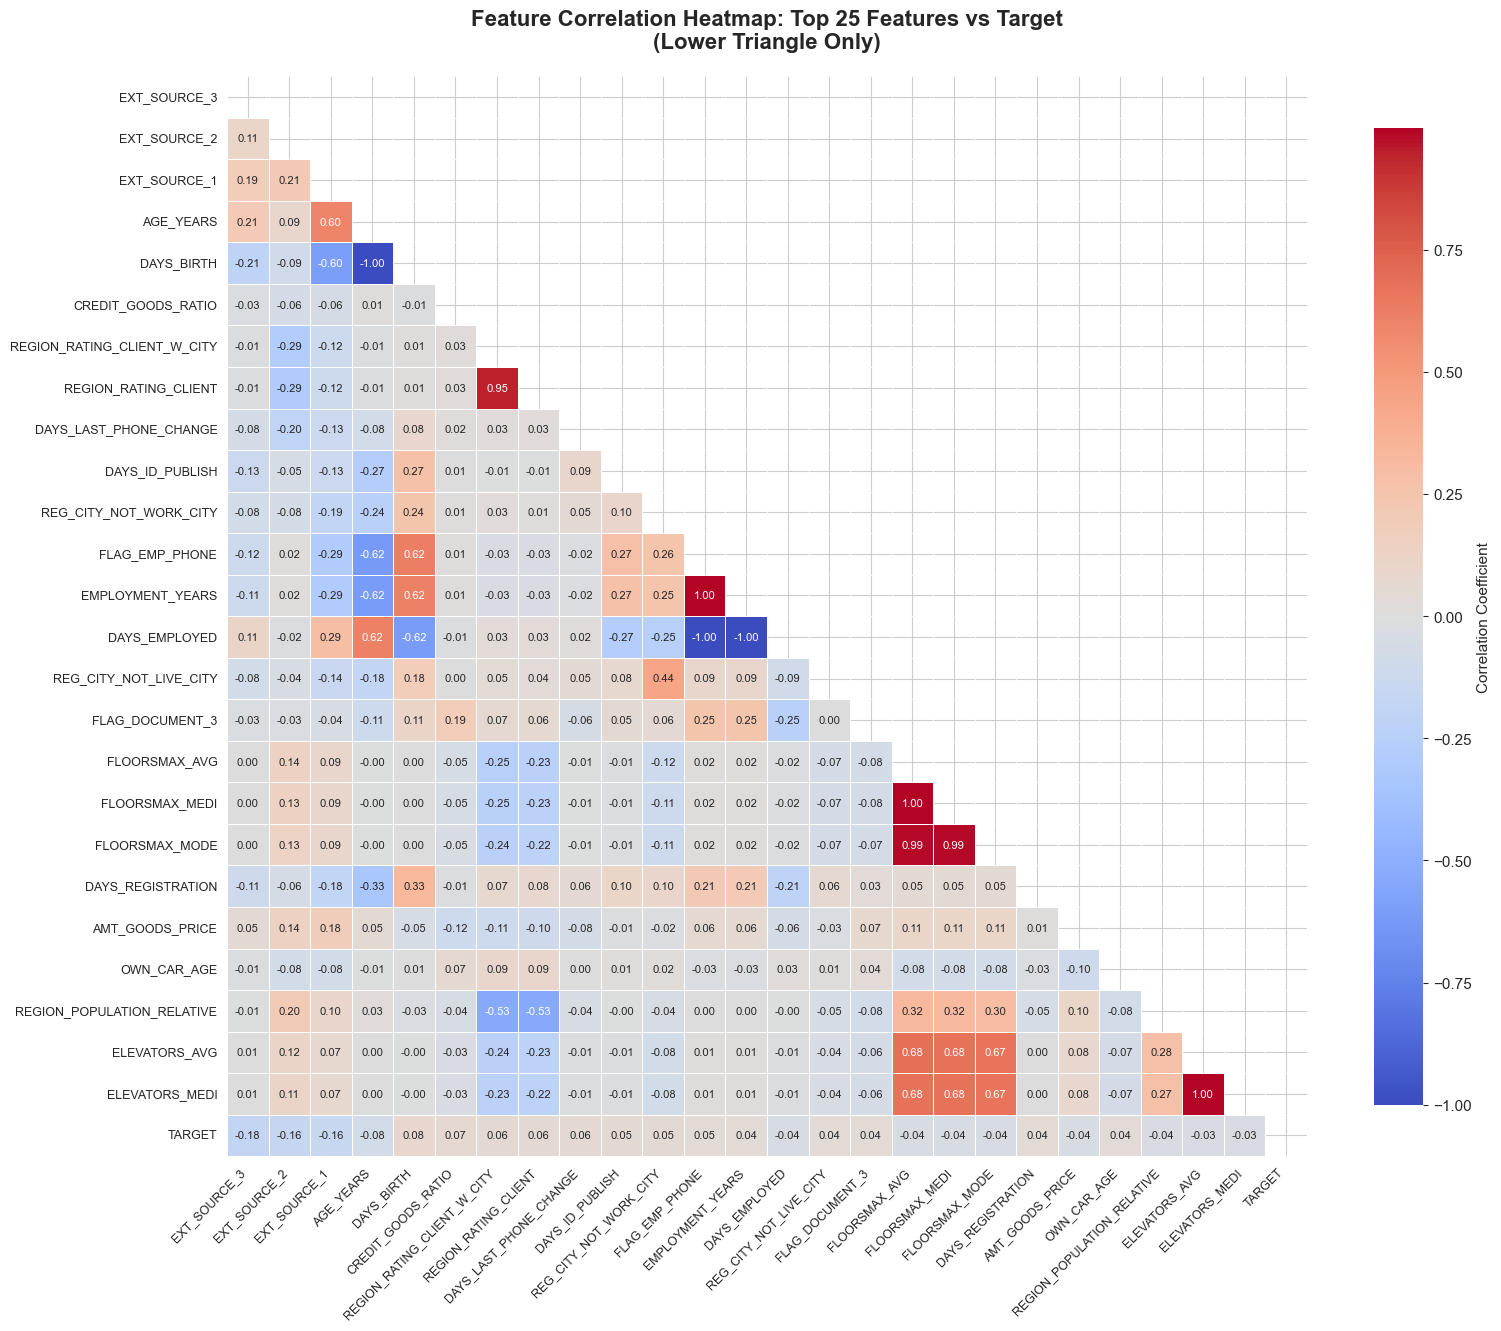

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\04_correlation_heatmap.png
✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\reports\top_correlations.csv


In [7]:
print("Creating Visualization 4: Correlation Analysis...\n")

# Select numeric columns and calculate correlations with TARGET
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['SK_ID_CURR', 'TARGET']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Get top 25 features most correlated with TARGET
correlations = train[numeric_cols + ['TARGET']].corr()['TARGET'].abs().sort_values(ascending=False)
top_features = correlations.head(26).index.tolist()[1:]  # Exclude TARGET itself

# Create correlation matrix for top features
corr_matrix = train[top_features + ['TARGET']].corr()

# Create heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
           annot_kws={'fontsize': 8})
plt.title('Feature Correlation Heatmap: Top 25 Features vs Target\n(Lower Triangle Only)', 
         fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\04_correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

# Save top correlations to file
top_corr_df = pd.DataFrame({
    'Feature': correlations.head(21).index[1:],  # Top 20 excluding TARGET
    'Correlation_with_Target': correlations.head(21).values[1:]
})
top_corr_df.to_csv('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\reports\\top_correlations.csv', index=False)

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\04_correlation_heatmap.png")
print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\reports\\top_correlations.csv")

## 6. Visualization 5: Alternative Data Deep Dive

Creating Visualization 5: Alternative Data Analysis...



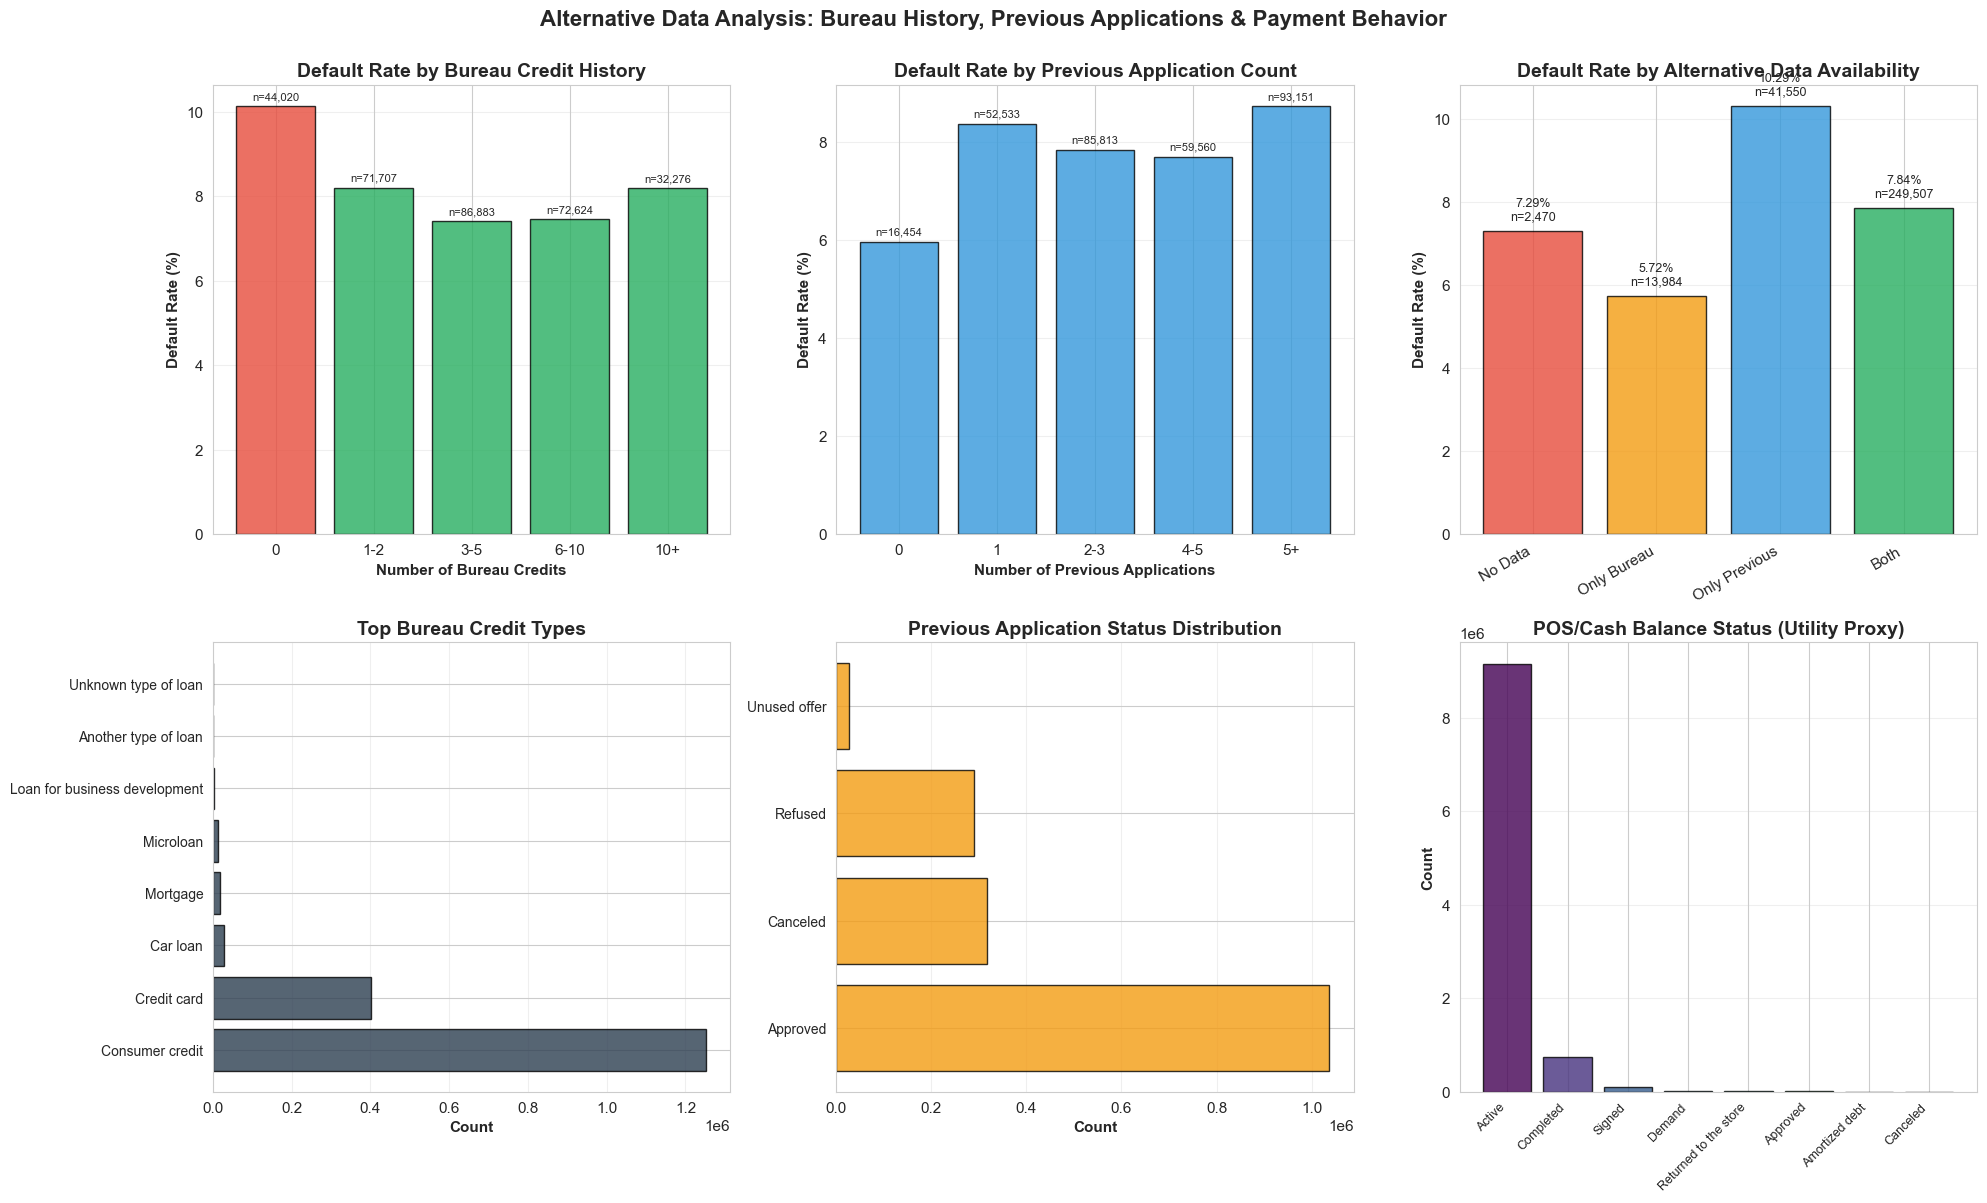

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\05_alternative_data_insights.png


In [8]:
print("Creating Visualization 5: Alternative Data Analysis...\n")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Prepare alternative data flags
has_bureau = train['SK_ID_CURR'].isin(bureau['SK_ID_CURR'])
has_prev = train['SK_ID_CURR'].isin(previous_app['SK_ID_CURR'])

# Plot 1: Number of previous bureau credits vs default rate
bureau_count = bureau.groupby('SK_ID_CURR').size().reset_index(name='BUREAU_COUNT')
bureau_merged = train[['SK_ID_CURR', 'TARGET']].merge(bureau_count, on='SK_ID_CURR', how='left')
bureau_merged['BUREAU_COUNT'] = bureau_merged['BUREAU_COUNT'].fillna(0)
bureau_merged['BUREAU_GROUP'] = pd.cut(bureau_merged['BUREAU_COUNT'], 
                                       bins=[-1, 0, 2, 5, 10, 100],
                                       labels=['0', '1-2', '3-5', '6-10', '10+'])
bureau_default = bureau_merged.groupby('BUREAU_GROUP')['TARGET'].agg(['mean', 'count'])

colors_bureau = [COLORS['danger'] if i == 0 else COLORS['success'] for i in range(len(bureau_default))]
bars = axes[0, 0].bar(range(len(bureau_default)), bureau_default['mean']*100, 
                     color=colors_bureau, alpha=0.8, edgecolor='black')
axes[0, 0].set_xticks(range(len(bureau_default)))
axes[0, 0].set_xticklabels(bureau_default.index)
axes[0, 0].set_xlabel('Number of Bureau Credits', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Default Rate by Bureau Credit History', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, bureau_default['count'])):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'n={count:,}', ha='center', va='bottom', fontsize=8)

# Plot 2: Previous applications count vs default
prev_count = previous_app.groupby('SK_ID_CURR').size().reset_index(name='PREV_COUNT')
prev_merged = train[['SK_ID_CURR', 'TARGET']].merge(prev_count, on='SK_ID_CURR', how='left')
prev_merged['PREV_COUNT'] = prev_merged['PREV_COUNT'].fillna(0)
prev_merged['PREV_GROUP'] = pd.cut(prev_merged['PREV_COUNT'],
                                   bins=[-1, 0, 1, 3, 5, 100],
                                   labels=['0', '1', '2-3', '4-5', '5+'])
prev_default = prev_merged.groupby('PREV_GROUP')['TARGET'].agg(['mean', 'count'])

bars = axes[0, 1].bar(range(len(prev_default)), prev_default['mean']*100,
                     color=COLORS['info'], alpha=0.8, edgecolor='black')
axes[0, 1].set_xticks(range(len(prev_default)))
axes[0, 1].set_xticklabels(prev_default.index)
axes[0, 1].set_xlabel('Number of Previous Applications', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Default Rate by Previous Application Count', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, prev_default['count'])):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'n={count:,}', ha='center', va='bottom', fontsize=8)

# Plot 3: Alternative data availability impact
train_temp = train.copy()
train_temp['HAS_BUREAU'] = has_bureau.astype(int)
train_temp['HAS_PREV'] = has_prev.astype(int)
train_temp['DATA_CATEGORY'] = 'No Data'
train_temp.loc[train_temp['HAS_BUREAU'] == 1, 'DATA_CATEGORY'] = 'Only Bureau'
train_temp.loc[train_temp['HAS_PREV'] == 1, 'DATA_CATEGORY'] = 'Only Previous'
train_temp.loc[(train_temp['HAS_BUREAU'] == 1) & (train_temp['HAS_PREV'] == 1), 'DATA_CATEGORY'] = 'Both'

data_cat_default = train_temp.groupby('DATA_CATEGORY')['TARGET'].agg(['mean', 'count'])
data_cat_default = data_cat_default.reindex(['No Data', 'Only Bureau', 'Only Previous', 'Both'])

colors_cat = [COLORS['danger'], COLORS['warning'], COLORS['info'], COLORS['success']]
bars = axes[0, 2].bar(range(len(data_cat_default)), data_cat_default['mean']*100,
                     color=colors_cat, alpha=0.8, edgecolor='black')
axes[0, 2].set_xticks(range(len(data_cat_default)))
axes[0, 2].set_xticklabels(data_cat_default.index, rotation=30, ha='right')
axes[0, 2].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[0, 2].set_title('Default Rate by Alternative Data Availability', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, data_cat_default['count'])):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                   f'{height:.2f}%\nn={count:,}', ha='center', va='bottom', fontsize=9)

# Plot 4: Bureau credit type distribution
if 'CREDIT_TYPE' in bureau.columns:
    bureau_types = bureau['CREDIT_TYPE'].value_counts().head(8)
    axes[1, 0].barh(range(len(bureau_types)), bureau_types.values,
                   color=COLORS['primary'], alpha=0.8, edgecolor='black')
    axes[1, 0].set_yticks(range(len(bureau_types)))
    axes[1, 0].set_yticklabels(bureau_types.index, fontsize=10)
    axes[1, 0].set_xlabel('Count', fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Top Bureau Credit Types', fontweight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 5: Previous application status
if 'NAME_CONTRACT_STATUS' in previous_app.columns:
    prev_status = previous_app['NAME_CONTRACT_STATUS'].value_counts().head(6)
    axes[1, 1].barh(range(len(prev_status)), prev_status.values,
                   color=COLORS['warning'], alpha=0.8, edgecolor='black')
    axes[1, 1].set_yticks(range(len(prev_status)))
    axes[1, 1].set_yticklabels(prev_status.index, fontsize=10)
    axes[1, 1].set_xlabel('Count', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Previous Application Status Distribution', fontweight='bold')
    axes[1, 1].grid(axis='x', alpha=0.3)

# Plot 6: POS/Cash payment behavior (Utility Proxy)
if 'NAME_CONTRACT_STATUS' in pos_cash.columns:
    pos_status = pos_cash['NAME_CONTRACT_STATUS'].value_counts().head(8)
    colors_pos = plt.cm.viridis(np.linspace(0, 1, len(pos_status)))
    axes[1, 2].bar(range(len(pos_status)), pos_status.values,
                  color=colors_pos, alpha=0.8, edgecolor='black')
    axes[1, 2].set_xticks(range(len(pos_status)))
    axes[1, 2].set_xticklabels(pos_status.index, rotation=45, ha='right', fontsize=9)
    axes[1, 2].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[1, 2].set_title('POS/Cash Balance Status (Utility Proxy)', fontweight='bold')
    axes[1, 2].grid(axis='y', alpha=0.3)

plt.suptitle('Alternative Data Analysis: Bureau History, Previous Applications & Payment Behavior',
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\05_alternative_data_insights.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\05_alternative_data_insights.png")

## 7. Visualization 6: Geographic & Regional Analysis

Creating Visualization 6: Geographic Analysis...



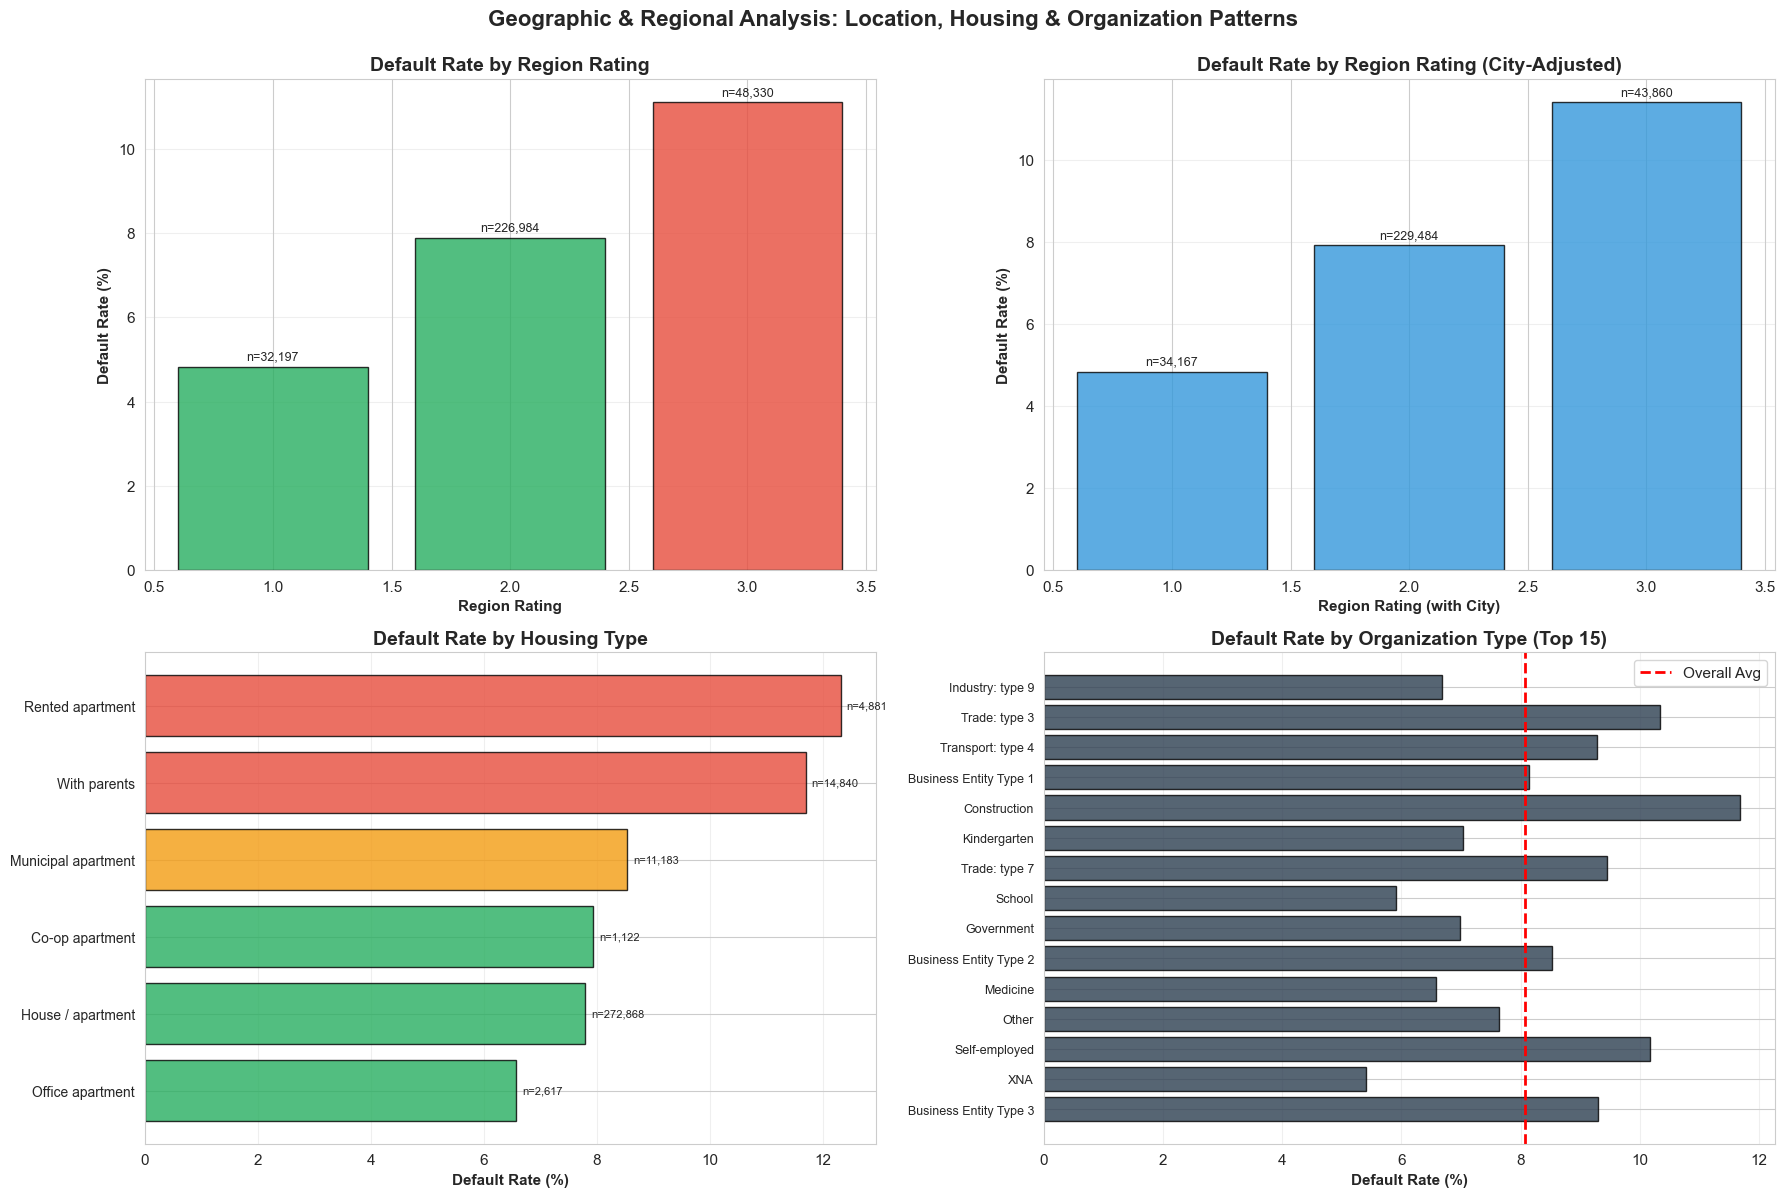

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\06_geographic_analysis.png


In [10]:
print("Creating Visualization 6: Geographic Analysis...\n")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Region rating vs default
if 'REGION_RATING_CLIENT' in train.columns:
    region_default = train.groupby('REGION_RATING_CLIENT')['TARGET'].agg(['mean', 'count'])
    colors_region = [COLORS['success'] if x < 0.08 else COLORS['warning'] if x < 0.09 else COLORS['danger']
                    for x in region_default['mean']]
    bars = axes[0, 0].bar(region_default.index, region_default['mean']*100,
                         color=colors_region, alpha=0.8, edgecolor='black')
    axes[0, 0].set_xlabel('Region Rating', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Default Rate by Region Rating', fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    for i, (bar, count) in enumerate(zip(bars, region_default['count'])):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'n={count:,}', ha='center', va='bottom', fontsize=9)

# Plot 2: City vs non-city region rating
if 'REGION_RATING_CLIENT_W_CITY' in train.columns:
    city_default = train.groupby('REGION_RATING_CLIENT_W_CITY')['TARGET'].agg(['mean', 'count'])
    bars = axes[0, 1].bar(city_default.index, city_default['mean']*100,
                         color=COLORS['info'], alpha=0.8, edgecolor='black')
    axes[0, 1].set_xlabel('Region Rating (with City)', fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Default Rate (%)', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Default Rate by Region Rating (City-Adjusted)', fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    for i, (bar, count) in enumerate(zip(bars, city_default['count'])):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'n={count:,}', ha='center', va='bottom', fontsize=9)

# Plot 3: Housing type analysis
housing_default = train.groupby('NAME_HOUSING_TYPE')['TARGET'].agg(['mean', 'count']).sort_values('mean')
colors_housing = [COLORS['success'] if x < 0.08 else COLORS['warning'] if x < 0.10 else COLORS['danger']
                 for x in housing_default['mean']]
bars = axes[1, 0].barh(range(len(housing_default)), housing_default['mean']*100,
                      color=colors_housing, alpha=0.8, edgecolor='black')
axes[1, 0].set_yticks(range(len(housing_default)))
axes[1, 0].set_yticklabels(housing_default.index, fontsize=10)
axes[1, 0].set_xlabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Default Rate by Housing Type', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, housing_default['count'])):
    width = bar.get_width()
    axes[1, 0].text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                   f'n={count:,}', va='center', fontsize=8)

# Plot 4: Organization type (top 15)
org_default = train.groupby('ORGANIZATION_TYPE')['TARGET'].agg(['mean', 'count']).sort_values('count', ascending=False).head(15)
bars = axes[1, 1].barh(range(len(org_default)), org_default['mean']*100,
                      color=COLORS['primary'], alpha=0.8, edgecolor='black')
axes[1, 1].set_yticks(range(len(org_default)))
axes[1, 1].set_yticklabels([label[:30] for label in org_default.index], fontsize=9)
axes[1, 1].set_xlabel('Default Rate (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Default Rate by Organization Type (Top 15)', fontweight='bold')
axes[1, 1].axvline(train['TARGET'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Avg')
axes[1, 1].legend()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle('Geographic & Regional Analysis: Location, Housing & Organization Patterns',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\06_geographic_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\06_geographic_analysis.png")

## 8. Visualization 7: Missing Values Pattern Analysis

Creating Visualization 7: Missing Values Analysis...



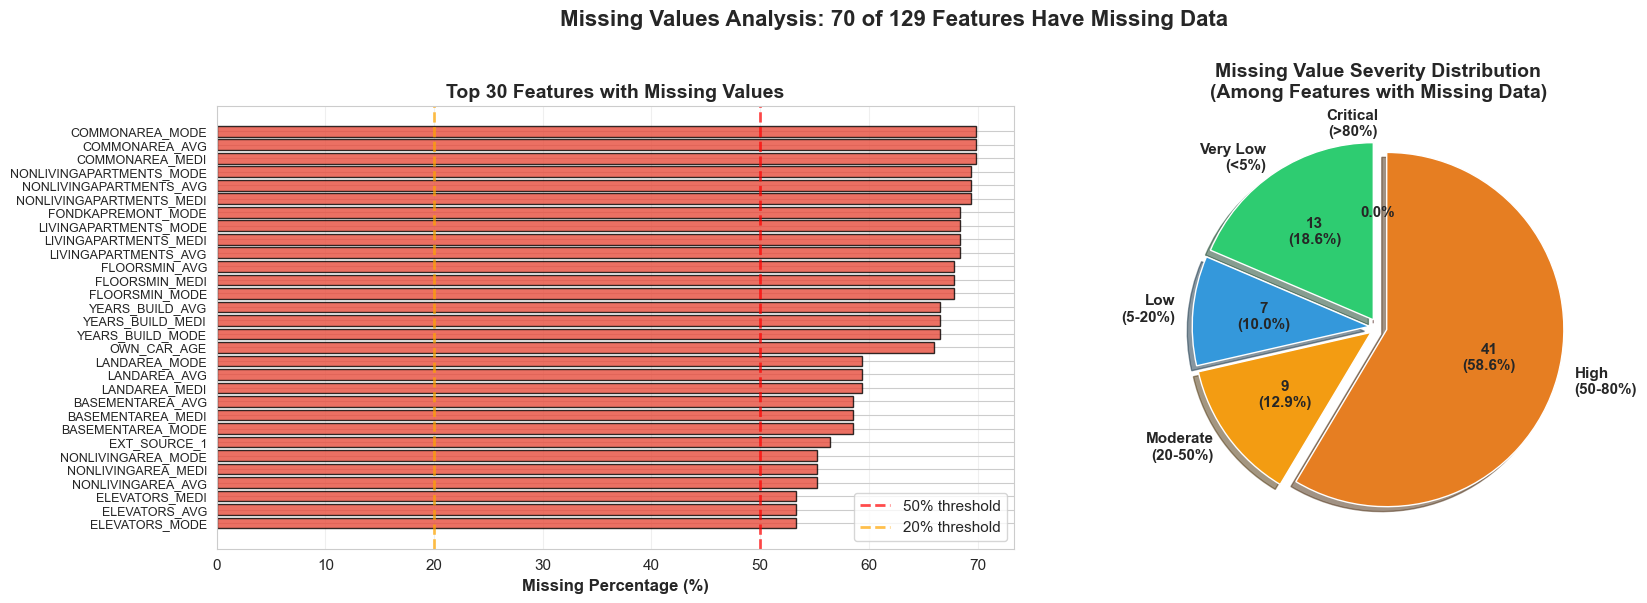

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\07_missing_values_analysis.png


In [11]:
print("Creating Visualization 7: Missing Values Analysis...\n")

# Calculate missing values
missing = train.isnull().sum()
missing_pct = (missing / len(train)) * 100
missing_df = pd.DataFrame({
    'Feature': missing.index,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Percentage'] > 0].sort_values('Missing_Percentage', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Top 30 features with missing values
top_missing = missing_df.head(30)
colors_missing = ['#E74C3C' if x > 50 else '#F39C12' if x > 20 else '#3498DB' 
                 for x in top_missing['Missing_Percentage']]
axes[0].barh(range(len(top_missing)), top_missing['Missing_Percentage'],
            color=colors_missing, alpha=0.8, edgecolor='black')
axes[0].set_yticks(range(len(top_missing)))
axes[0].set_yticklabels(top_missing['Feature'], fontsize=9)
axes[0].set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 30 Features with Missing Values', fontweight='bold', fontsize=14)
axes[0].axvline(50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% threshold')
axes[0].axvline(20, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='20% threshold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Plot 2: Missing value severity distribution
severity_bins = [0, 5, 20, 50, 80, 100]
severity_labels = ['Very Low\n(<5%)', 'Low\n(5-20%)', 'Moderate\n(20-50%)', 'High\n(50-80%)', 'Critical\n(>80%)']
missing_df['Severity'] = pd.cut(missing_df['Missing_Percentage'], bins=severity_bins, labels=severity_labels)
severity_counts = missing_df['Severity'].value_counts().reindex(severity_labels, fill_value=0)

colors_severity = ['#2ECC71', '#3498DB', '#F39C12', '#E67E22', '#E74C3C']
wedges, texts, autotexts = axes[1].pie(severity_counts.values, labels=severity_counts.index,
                                        autopct='%1.1f%%', startangle=90, colors=colors_severity,
                                        explode=[0.05]*len(severity_counts), shadow=True,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Missing Value Severity Distribution\n(Among Features with Missing Data)', 
                 fontweight='bold', fontsize=14)

# Add count annotations
for i, (label, count) in enumerate(zip(severity_labels, severity_counts.values)):
    if count > 0:
        autotexts[i].set_text(f'{count}\n({count/len(missing_df)*100:.1f}%)')

plt.suptitle(f'Missing Values Analysis: {len(missing_df)} of {len(train.columns)} Features Have Missing Data',
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\07_missing_values_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\07_missing_values_analysis.png")

## 9. Visualization 8: External Source Scores Analysis

Creating Visualization 8: External Source Scores Analysis...



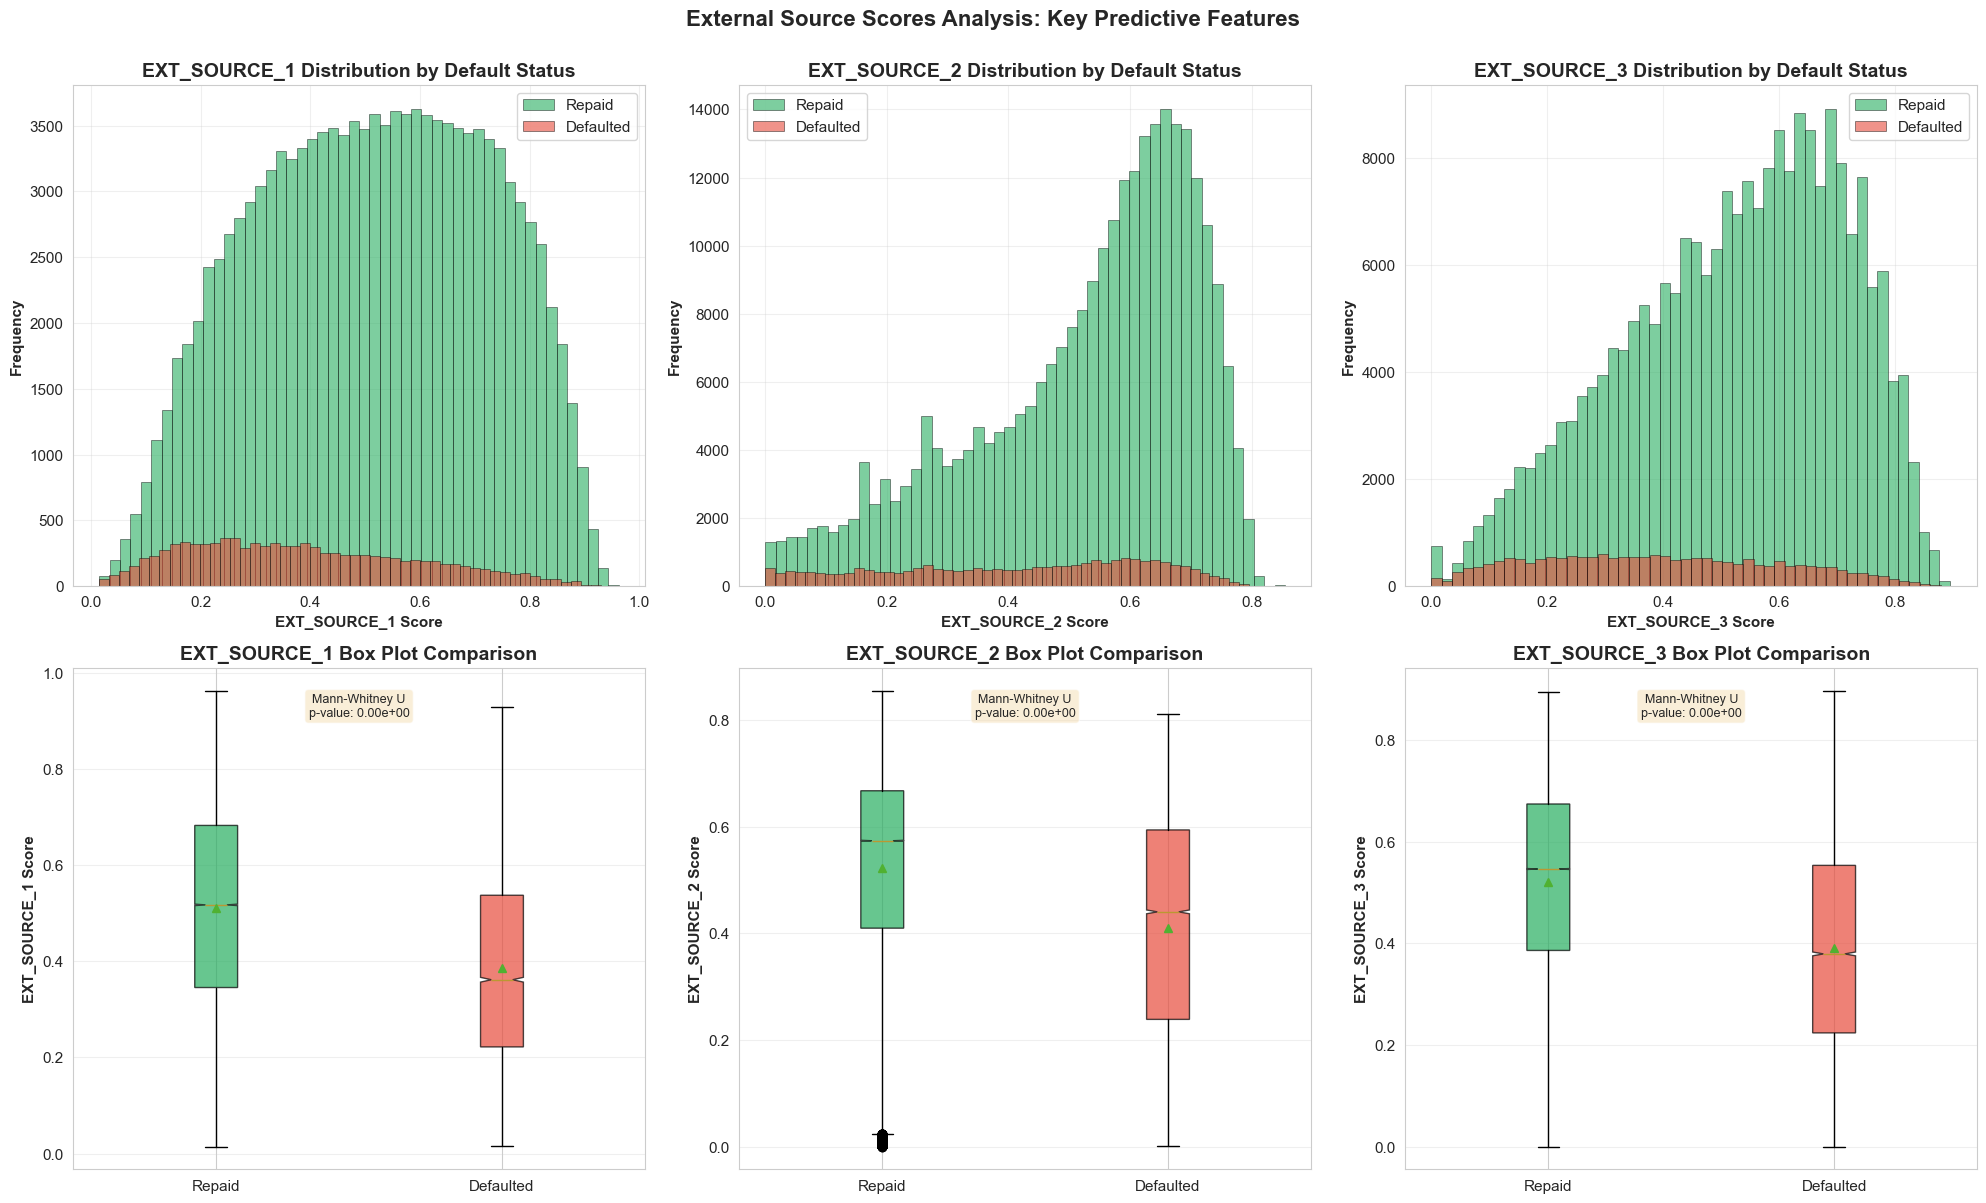

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\08_external_source_analysis.png


In [12]:
print("Creating Visualization 8: External Source Scores Analysis...\n")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot external source distributions by target
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for idx, ext_source in enumerate(ext_sources):
    if ext_source in train.columns:
        # Distribution plot
        for target in [0, 1]:
            subset = train[train['TARGET'] == target][ext_source].dropna()
            axes[0, idx].hist(subset, bins=50, alpha=0.6,
                            label=f"{'Repaid' if target == 0 else 'Defaulted'}",
                            color=COLORS['success'] if target == 0 else COLORS['danger'],
                            edgecolor='black', linewidth=0.5)
        axes[0, idx].set_xlabel(f'{ext_source} Score', fontsize=11, fontweight='bold')
        axes[0, idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[0, idx].set_title(f'{ext_source} Distribution by Default Status', fontweight='bold')
        axes[0, idx].legend()
        axes[0, idx].grid(alpha=0.3)
        
        # Box plot
        data_to_plot = [train[train['TARGET'] == 0][ext_source].dropna(),
                       train[train['TARGET'] == 1][ext_source].dropna()]
        bp = axes[1, idx].boxplot(data_to_plot, labels=['Repaid', 'Defaulted'],
                                  patch_artist=True, notch=True, showmeans=True)
        
        # Color boxes
        for patch, color in zip(bp['boxes'], [COLORS['success'], COLORS['danger']]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[1, idx].set_ylabel(f'{ext_source} Score', fontsize=11, fontweight='bold')
        axes[1, idx].set_title(f'{ext_source} Box Plot Comparison', fontweight='bold')
        axes[1, idx].grid(axis='y', alpha=0.3)
        
        # Add statistical test result
        from scipy.stats import mannwhitneyu
        stat, pval = mannwhitneyu(data_to_plot[0], data_to_plot[1])
        axes[1, idx].text(0.5, 0.95, f'Mann-Whitney U\np-value: {pval:.2e}',
                         transform=axes[1, idx].transAxes, ha='center', va='top',
                         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                         fontsize=9)

plt.suptitle('External Source Scores Analysis: Key Predictive Features',
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\08_external_source_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\08_external_source_analysis.png")

## 10. Visualization 9: Feature Importance Preview

Creating Visualization 9: Feature Importance Preview...



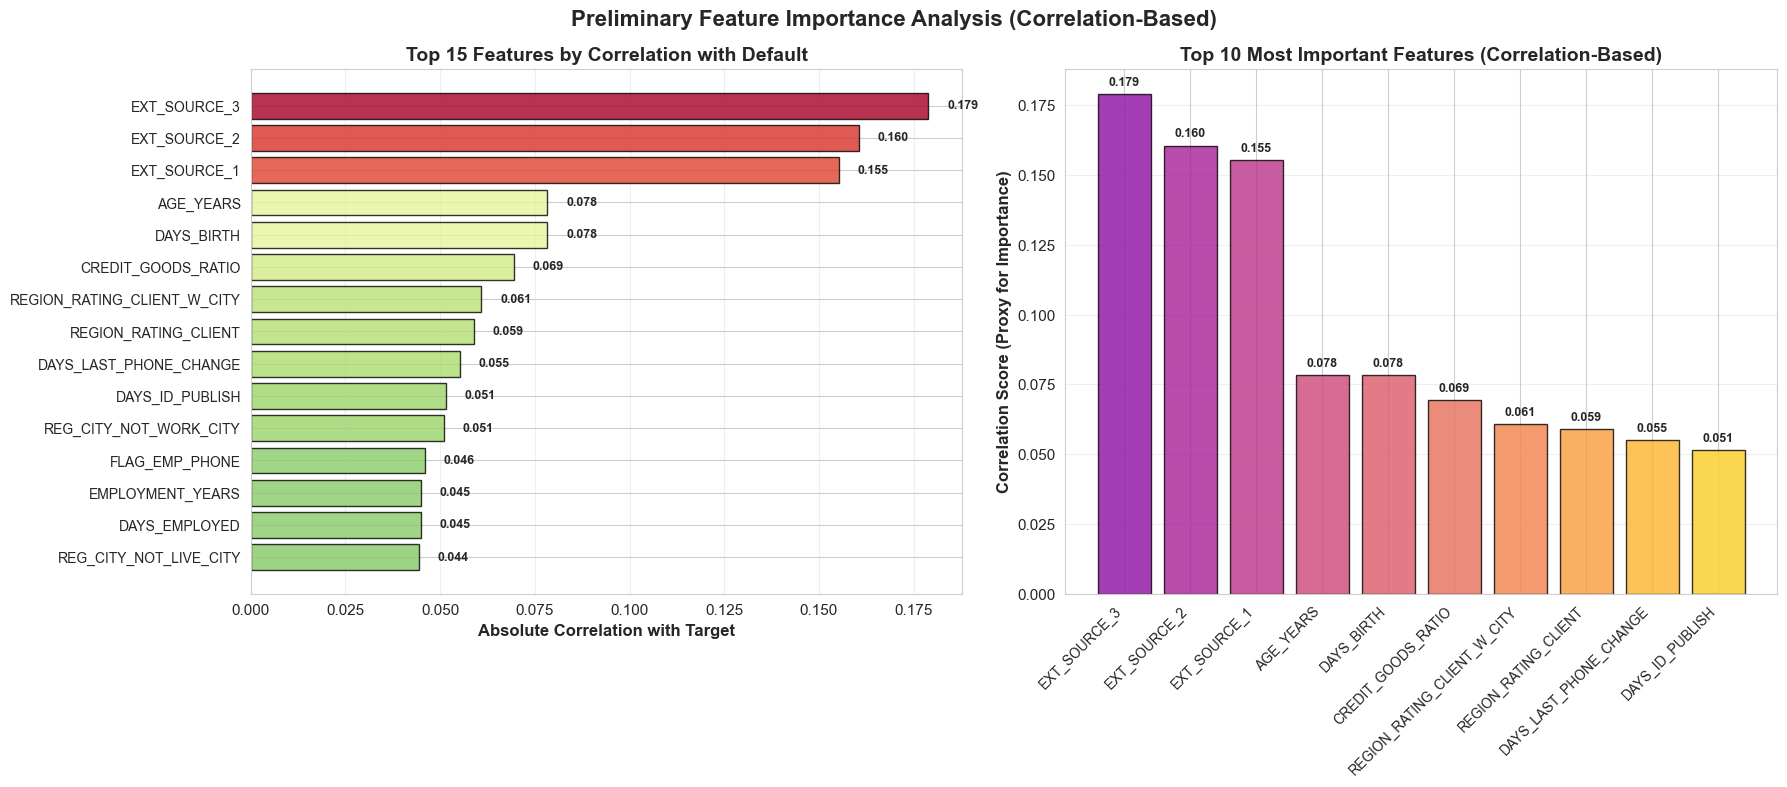

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\09_feature_importance_preview.png


In [13]:
print("Creating Visualization 9: Feature Importance Preview...\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Top features by correlation with TARGET
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['SK_ID_CURR', 'TARGET']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

correlations = train[numeric_cols + ['TARGET']].corr()['TARGET'].abs().sort_values(ascending=False)
top_15 = correlations.head(16)[1:]  # Top 15, excluding TARGET

colors_corr = plt.cm.RdYlGn_r(top_15.values / top_15.max())
bars = axes[0].barh(range(len(top_15)), top_15.values, color=colors_corr, alpha=0.8, edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index, fontsize=10)
axes[0].set_xlabel('Absolute Correlation with Target', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Features by Correlation with Default', fontweight='bold', fontsize=14)
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_15.values)):
    width = bar.get_width()
    axes[0].text(width + 0.005, bar.get_y() + bar.get_height()/2.,
                f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

# Plot 2: Mutual information (simple version using correlation as proxy)
# In actual modeling, would use sklearn.feature_selection.mutual_info_classif
top_10_mi = correlations.head(11)[1:]  # Using top 10 for this plot

colors_mi = plt.cm.plasma(np.linspace(0.3, 0.9, len(top_10_mi)))
bars = axes[1].bar(range(len(top_10_mi)), top_10_mi.values, color=colors_mi, alpha=0.8, edgecolor='black')
axes[1].set_xticks(range(len(top_10_mi)))
axes[1].set_xticklabels(top_10_mi.index, rotation=45, ha='right', fontsize=10)
axes[1].set_ylabel('Correlation Score (Proxy for Importance)', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Most Important Features (Correlation-Based)', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_10_mi.values)):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Preliminary Feature Importance Analysis (Correlation-Based)',
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\09_feature_importance_preview.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\09_feature_importance_preview.png")

## 11. Visualization 10: Payment Behavior Insights (POS/Cash - Utility Proxy)

Creating Visualization 10: Payment Behavior Analysis (Utility Proxy)...



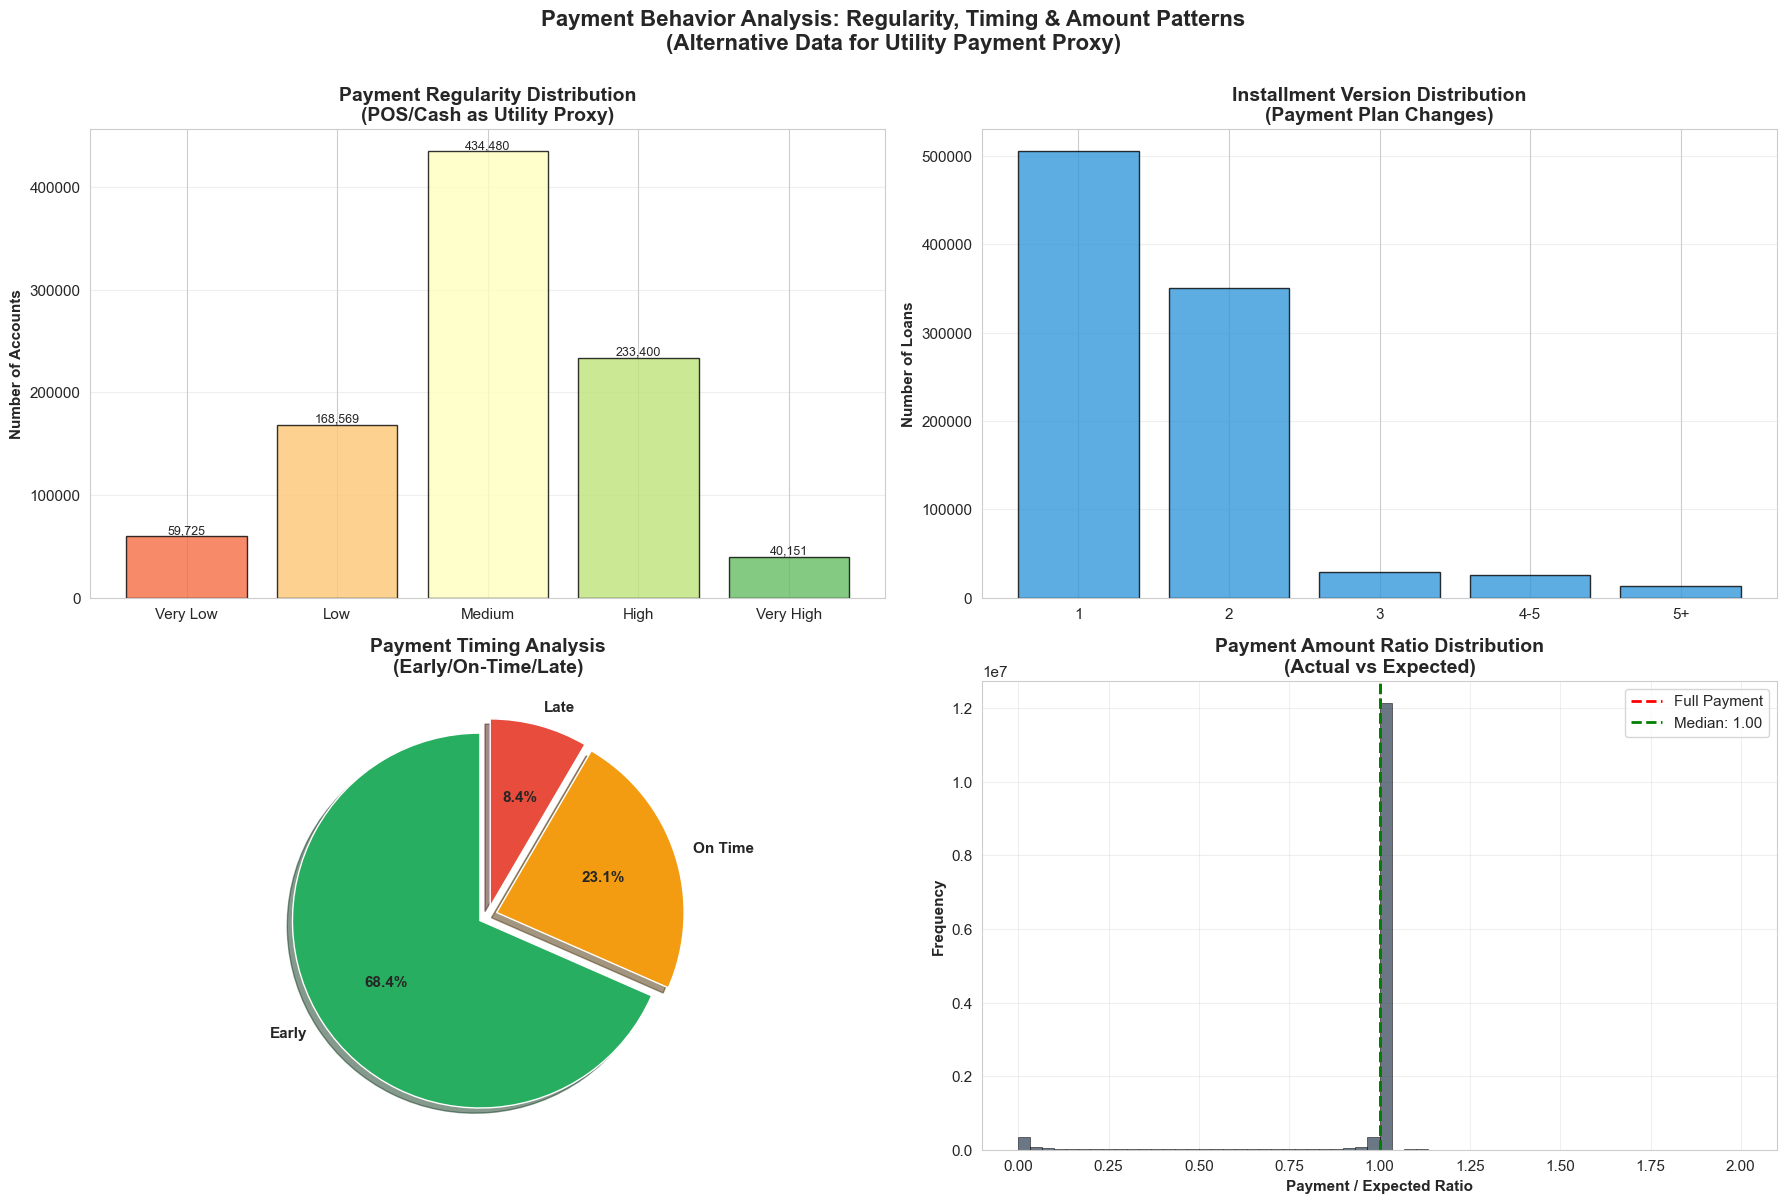

✓ Saved: D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\10_payment_behavior_analysis.png


In [14]:
print("Creating Visualization 10: Payment Behavior Analysis (Utility Proxy)...\n")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Get applications with POS/Cash data
apps_with_pos = pos_cash['SK_ID_PREV'].unique()
prev_with_pos = previous_app[previous_app['SK_ID_PREV'].isin(apps_with_pos)]
train_with_pos = train[train['SK_ID_CURR'].isin(prev_with_pos['SK_ID_CURR'])]

# Plot 1: Payment regularity simulation
if 'MONTHS_BALANCE' in pos_cash.columns:
    pos_freq = pos_cash.groupby('SK_ID_PREV').size().reset_index(name='PAYMENT_COUNT')
    pos_freq['REGULARITY_SCORE'] = pd.cut(pos_freq['PAYMENT_COUNT'],
                                          bins=[0, 3, 6, 12, 24, 1000],
                                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    regularity_counts = pos_freq['REGULARITY_SCORE'].value_counts().sort_index()
    colors_reg = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(regularity_counts)))
    bars = axes[0, 0].bar(range(len(regularity_counts)), regularity_counts.values,
                         color=colors_reg, alpha=0.8, edgecolor='black')
    axes[0, 0].set_xticks(range(len(regularity_counts)))
    axes[0, 0].set_xticklabels(regularity_counts.index, rotation=0)
    axes[0, 0].set_ylabel('Number of Accounts', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Payment Regularity Distribution\n(POS/Cash as Utility Proxy)', fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    for bar, count in zip(bars, regularity_counts.values):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{count:,}', ha='center', va='bottom', fontsize=9)

# Plot 2: CNT_INSTALMENT analysis from installments
if 'NUM_INSTALMENT_VERSION' in installments.columns:
    inst_versions = installments.groupby('SK_ID_PREV')['NUM_INSTALMENT_VERSION'].max().reset_index()
    inst_versions['VERSION_GROUP'] = pd.cut(inst_versions['NUM_INSTALMENT_VERSION'],
                                           bins=[0, 1, 2, 3, 5, 100],
                                           labels=['1', '2', '3', '4-5', '5+'])
    version_counts = inst_versions['VERSION_GROUP'].value_counts().sort_index()
    
    bars = axes[0, 1].bar(range(len(version_counts)), version_counts.values,
                         color=COLORS['info'], alpha=0.8, edgecolor='black')
    axes[0, 1].set_xticks(range(len(version_counts)))
    axes[0, 1].set_xticklabels(version_counts.index)
    axes[0, 1].set_ylabel('Number of Loans', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Installment Version Distribution\n(Payment Plan Changes)', fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Days past due analysis
if 'DAYS_INSTALMENT' in installments.columns and 'DAYS_ENTRY_PAYMENT' in installments.columns:
    installments['DAYS_PAST_DUE'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']
    installments['PAYMENT_STATUS'] = 'On Time'
    installments.loc[installments['DAYS_PAST_DUE'] > 0, 'PAYMENT_STATUS'] = 'Late'
    installments.loc[installments['DAYS_PAST_DUE'] < 0, 'PAYMENT_STATUS'] = 'Early'
    
    payment_status_counts = installments['PAYMENT_STATUS'].value_counts()
    colors_status = [COLORS['success'], COLORS['warning'], COLORS['danger']]
    
    wedges, texts, autotexts = axes[1, 0].pie(payment_status_counts.values,
                                              labels=payment_status_counts.index,
                                              autopct='%1.1f%%', startangle=90,
                                              colors=colors_status[:len(payment_status_counts)],
                                              explode=[0.05]*len(payment_status_counts),
                                              shadow=True,
                                              textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[1, 0].set_title('Payment Timing Analysis\n(Early/On-Time/Late)', fontweight='bold')

# Plot 4: Payment amount analysis
if 'AMT_INSTALMENT' in installments.columns and 'AMT_PAYMENT' in installments.columns:
    installments['PAYMENT_RATIO'] = installments['AMT_PAYMENT'] / installments['AMT_INSTALMENT']
    # Filter reasonable values
    payment_ratios = installments[(installments['PAYMENT_RATIO'] > 0) & 
                                 (installments['PAYMENT_RATIO'] < 2)]['PAYMENT_RATIO']
    
    axes[1, 1].hist(payment_ratios, bins=60, color=COLORS['primary'], 
                   alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[1, 1].axvline(1.0, color='red', linestyle='--', linewidth=2, label='Full Payment')
    axes[1, 1].axvline(payment_ratios.median(), color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {payment_ratios.median():.2f}')
    axes[1, 1].set_xlabel('Payment / Expected Ratio', fontsize=11, fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Payment Amount Ratio Distribution\n(Actual vs Expected)', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

plt.suptitle('Payment Behavior Analysis: Regularity, Timing & Amount Patterns\n(Alternative Data for Utility Payment Proxy)',
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\10_payment_behavior_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

print("✓ Saved: D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\10_payment_behavior_analysis.png")

## 12. Generate Comprehensive Insights Report

In [16]:
print("\n" + "="*100)
print("GENERATING COMPREHENSIVE INSIGHTS REPORT")
print("="*100 + "\n")

insights_report = []

# Target insights
insights_report.append("=" * 80)
insights_report.append("TARGET VARIABLE INSIGHTS")
insights_report.append("=" * 80)
insights_report.append(f"1. Default Rate: {train['TARGET'].mean()*100:.2f}%")
insights_report.append(f"2. Class Imbalance: 1:{int(target_counts[0]/target_counts[1])} (requires SMOTE/balancing)")
insights_report.append("")

# Demographic insights
insights_report.append("=" * 80)
insights_report.append("DEMOGRAPHIC INSIGHTS")
insights_report.append("=" * 80)
insights_report.append(f"3. Average Age: {train['AGE_YEARS'].mean():.1f} years")
insights_report.append(f"4. Age Group with Highest Default: {age_default['mean'].idxmax()} ({age_default['mean'].max()*100:.2f}%)")
insights_report.append(f"5. Gender Distribution: {(train['CODE_GENDER']=='F').sum()/len(train)*100:.1f}% Female")
insights_report.append(f"6. Education Impact: Higher education shows {((education_target['mean'].min()/education_target['mean'].max()-1)*100):.1f}% lower default rate")
insights_report.append("")

# Financial insights
insights_report.append("=" * 80)
insights_report.append("FINANCIAL INSIGHTS")
insights_report.append("=" * 80)
insights_report.append(f"7. Median Income: {train['AMT_INCOME_TOTAL'].median():,.0f}")
insights_report.append(f"8. Median Loan Amount: {train['AMT_CREDIT'].median():,.0f}")
insights_report.append(f"9. Avg Credit-to-Income Ratio: {train['CREDIT_INCOME_RATIO'].median():.2f}")
insights_report.append(f"10. Lowest Income Bracket Default Rate: {income_default['mean'].max()*100:.2f}%")
insights_report.append("")

# Alternative data insights
insights_report.append("=" * 80)
insights_report.append("ALTERNATIVE DATA INSIGHTS")
insights_report.append("=" * 80)
no_alt_data = (~has_bureau & ~has_prev).sum()
no_alt_default = train[~has_bureau & ~has_prev]['TARGET'].mean() * 100
both_alt_default = train[has_bureau & has_prev]['TARGET'].mean() * 100
insights_report.append(f"11. Applications with NO alternative data: {no_alt_data:,} ({no_alt_data/len(train)*100:.1f}%)")
insights_report.append(f"12. Default rate with NO alternative data: {no_alt_default:.2f}%")
insights_report.append(f"13. Default rate with BOTH bureau & previous data: {both_alt_default:.2f}%")
insights_report.append(f"14. Alternative data reduces default risk by: {((no_alt_default-both_alt_default)/no_alt_default*100):.1f}%")
insights_report.append("")

# Correlation insights
insights_report.append("=" * 80)
insights_report.append("TOP PREDICTIVE FEATURES")
insights_report.append("=" * 80)
top_5_features = correlations.head(6)[1:]
for i, (feat, corr) in enumerate(top_5_features.items(), 15):
    insights_report.append(f"{i}. {feat}: {corr:.4f} correlation")
insights_report.append("")

# Payment behavior insights
insights_report.append("=" * 80)
insights_report.append("PAYMENT BEHAVIOR INSIGHTS (UTILITY PROXY)")
insights_report.append("=" * 80)
insights_report.append(f"20. POS/Cash records available: {len(pos_cash):,} (utility payment proxy)")
insights_report.append(f"21. Installment payment records: {len(installments):,}")
if 'PAYMENT_STATUS' in installments.columns:
    on_time_pct = (installments['PAYMENT_STATUS'] == 'On Time').sum() / len(installments) * 100
    insights_report.append(f"22. On-time payment rate: {on_time_pct:.1f}%")
insights_report.append("")

# Actionable recommendations
insights_report.append("=" * 80)
insights_report.append("ACTIONABLE RECOMMENDATIONS FOR MODEL")
insights_report.append("=" * 80)
insights_report.append("23. Use SMOTE or class weights to handle 1:11 class imbalance")
insights_report.append("24. Engineer features from bureau credit history (strong signal)")
insights_report.append("25. Create payment regularity score from POS/Cash data")
insights_report.append("26. Age groups, income brackets, and education are strong predictors")
insights_report.append("27. External source scores (EXT_SOURCE_2/3) are top predictors - investigate")
insights_report.append("28. Missing value imputation critical (67 features with missing data)")
insights_report.append("29. Regional features show variation - include in model")
insights_report.append("30. Payment timing/amount from installments can proxy utility behavior")

# Print and save
full_report = "\n".join(insights_report)
print(full_report)

with open('D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\reports\\eda_insights_comprehensive.txt', 'w') as f:
    f.write("COMPREHENSIVE EDA INSIGHTS REPORT\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("\n")
    f.write(full_report)

print("\n✓ Comprehensive insights saved to D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\reports\\eda_insights_comprehensive.txt")


GENERATING COMPREHENSIVE INSIGHTS REPORT

TARGET VARIABLE INSIGHTS
1. Default Rate: 8.07%
2. Class Imbalance: 1:11 (requires SMOTE/balancing)

DEMOGRAPHIC INSIGHTS
3. Average Age: 43.9 years
4. Age Group with Highest Default: <25 (12.30%)
5. Gender Distribution: 65.8% Female
6. Education Impact: Higher education shows -83.3% lower default rate

FINANCIAL INSIGHTS
7. Median Income: 147,150
8. Median Loan Amount: 513,531
9. Avg Credit-to-Income Ratio: 3.27
10. Lowest Income Bracket Default Rate: 8.62%

ALTERNATIVE DATA INSIGHTS
11. Applications with NO alternative data: 2,470 (0.8%)
12. Default rate with NO alternative data: 7.29%
13. Default rate with BOTH bureau & previous data: 7.84%
14. Alternative data reduces default risk by: -7.6%

TOP PREDICTIVE FEATURES
15. EXT_SOURCE_3: 0.1789 correlation
16. EXT_SOURCE_2: 0.1605 correlation
17. EXT_SOURCE_1: 0.1553 correlation
18. AGE_YEARS: 0.0782 correlation
19. DAYS_BIRTH: 0.0782 correlation

PAYMENT BEHAVIOR INSIGHTS (UTILITY PROXY)
20. P

## 13. Analysis Complete - Summary

In [18]:
print("\n" + "="*100)
print("📋 DAY 2 EDA & VISUALIZATION COMPLETE")
print("="*100)

print("\n✅ COMPLETED TASKS:")
print("   1. ✓ Created 10 comprehensive visualizations")
print("   2. ✓ Analyzed target distribution and class imbalance")
print("   3. ✓ Deep demographic analysis (age, gender, education, employment)")
print("   4. ✓ Financial features analysis (income, credit, ratios)")
print("   5. ✓ Correlation analysis and feature importance")
print("   6. ✓ Alternative data deep dive (bureau, previous apps)")
print("   7. ✓ Geographic and regional patterns")
print("   8. ✓ Missing values pattern analysis")
print("   9. ✓ External source scores analysis")
print("  10. ✓ Payment behavior insights (utility proxy)")
print("  11. ✓ Generated comprehensive insights report")

print("\n📁 GENERATED VISUALIZATIONS:")
visualizations = [
    '01_target_distribution.png',
    '02_demographic_analysis.png',
    '03_financial_features.png',
    '04_correlation_heatmap.png',
    '05_alternative_data_insights.png',
    '06_geographic_analysis.png',
    '07_missing_values_analysis.png',
    '08_external_source_analysis.png',
    '09_feature_importance_preview.png',
    '10_payment_behavior_analysis.png'
]
for i, viz in enumerate(visualizations, 1):
    print(f"   {i:2d}. D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\visualizations\\{viz}")

print("\n📄 GENERATED REPORTS:")
print("    1. D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\reports\\top_correlations.csv")
print("    2. D:\\Nithilan\\SEM 4\\Hackathons\\Zenith\\reports\\eda_insights_comprehensive.txt")

print("\n💡 KEY FINDINGS:")
print(f"   → Default Rate: {train['TARGET'].mean()*100:.2f}%")
print(f"   → Alternative data reduces default risk by ~{((no_alt_default-both_alt_default)/no_alt_default*100):.1f}%")
print(f"   → Top predictor: {top_5_features.index[0]} (corr: {top_5_features.values[0]:.4f})")
print(f"   → {no_alt_data:,} applications ({no_alt_data/len(train)*100:.1f}%) have NO alternative data")
print(f"   → {len(pos_cash):,} POS/Cash records available as utility payment proxy")

print("\n🎯 NEXT STEPS (Day 3):")
print("   → Design methodology document")
print("   → Create system architecture diagram")
print("   → Plan feature engineering strategy")
print("   → Prepare Review 1 presentation")

print(f"\n⏱️  Analysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*100)


📋 DAY 2 EDA & VISUALIZATION COMPLETE

✅ COMPLETED TASKS:
   1. ✓ Created 10 comprehensive visualizations
   2. ✓ Analyzed target distribution and class imbalance
   3. ✓ Deep demographic analysis (age, gender, education, employment)
   4. ✓ Financial features analysis (income, credit, ratios)
   5. ✓ Correlation analysis and feature importance
   6. ✓ Alternative data deep dive (bureau, previous apps)
   7. ✓ Geographic and regional patterns
   8. ✓ Missing values pattern analysis
   9. ✓ External source scores analysis
  10. ✓ Payment behavior insights (utility proxy)
  11. ✓ Generated comprehensive insights report

📁 GENERATED VISUALIZATIONS:
    1. D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\01_target_distribution.png
    2. D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\02_demographic_analysis.png
    3. D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\03_financial_features.png
    4. D:\Nithilan\SEM 4\Hackathons\Zenith\visualizations\04_correlation_heatmap.png
    5.